#### Import Libraries


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merge sales files for each month into one dataframe

In [2]:
def all_months_data (dir_loc):
    yearly_sales = pd.DataFrame()
    files = [file  for  file in os.listdir(dir_loc) ]
    for f in files:
        df = pd.read_csv(f"{dir_loc}/{f}")
        yearly_sales = pd.concat([yearly_sales, df])
    return yearly_sales




In [3]:
yearly_sales = all_months_data("./Sales_Data")
yearly_sales.head(50)
yearly_sales.to_csv("sales_df.csv", index = False)

#### Analysing the best monthly sales

##### Read in merged data

In [4]:
sales_df = pd.read_csv("./sales_df.csv")
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### Do Data Cleaning

In [5]:
sales_df.isnull().values.any()

True

In [6]:
nan_df = sales_df[sales_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sales_df = sales_df.dropna(how="all")
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Filtered out duplicate data

In [8]:
sales_df = sales_df[sales_df["Order Date"].str[:2] != "Or"]
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Add the Month and Sales columns 

In [9]:
sales_df["Month"] = sales_df["Order Date"].str[0:2]
sales_df["Month"].astype('int32')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [10]:
sales_df.dtypes # checking the data types

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

##### Converting  price each and order date columns to numerical for calculation

In [11]:
sales_df["Quantity Ordered"] = pd.to_numeric(sales_df["Quantity Ordered"]) # make int
sales_df["Price Each"] =  pd.to_numeric(sales_df["Price Each"])  #make float

In [12]:
sales_df.dtypes # checking the data types

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [13]:

sales_df["Sales"] = sales_df["Quantity Ordered"] * sales_df["Price Each"]
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


##### Add a city column 

In [14]:
def get_city(x):
    return x.split(",")[1]

def get_state(x):
    return x.split(",")[2].split(" ")[1]

In [15]:
sales_df["City"] = sales_df["Purchase Address"].apply(lambda x : f"{get_city(x)} ({get_state(x)})")
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco (CA)


####  How much sales was earned each Month ?

In [16]:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
results = sales_df.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1811768.380,1822256.730
02,13449,2188884.720,2202022.420
03,17005,2791207.830,2807100.380
04,20558,3367671.020,3390670.240
05,18667,3135125.130,3152606.750
06,15253,2562025.610,2577802.260
07,16072,2632539.560,2647775.760
08,13448,2230345.420,2244467.880
09,13109,2084992.090,2097560.130


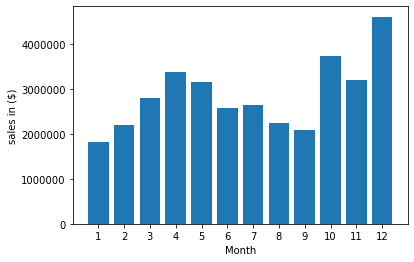

In [17]:
months = range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("sales in ($)")
plt.xlabel("Month")
plt.ticklabel_format(style='plain') 
plt.show()

#### What city has the highest  number of sales

In [18]:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
results = sales_df.groupby("City").sum()
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.200,2795498.580
Austin (TX),11153,1809873.610,1819581.750
Boston (MA),22528,3637409.770,3661642.010
Dallas (TX),16730,2752627.820,2767975.400
Los Angeles (CA),33289,5421435.230,5452570.800
New York City (NY),27932,4635370.830,4664317.430
Portland (ME),2750,447189.250,449758.270
Portland (OR),11303,1860558.220,1870732.340
San Francisco (CA),50239,8211461.740,8262203.910


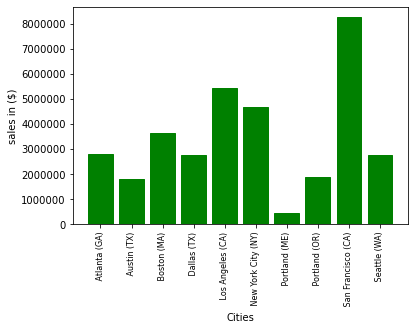

In [19]:
cities = [city for city,df in sales_df.groupby("City")]
bars = plt.bar(cities,results["Sales"])
for bar in bars:
    bar.set_color("green")
plt.xticks(cities, rotation="vertical" ,size=8)
plt.ylabel("sales in ($)")
plt.xlabel("Cities")
plt.ticklabel_format(axis="y",style='plain') 
plt.show()

#### What time should we advertise to maximize sales ?

In [20]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.950,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.900,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.990,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.990,Boston (MA)
3,176560,Google Phone,1,600.000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.000,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.990,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.990,Los Angeles (CA)


In [21]:
sales_df["Order Date"] = pd.to_datetime(sales_df["Order Date"]) # converting ordered date to date time
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.950,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.900,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.990,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.990,Boston (MA)
3,176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.000,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.990,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.990,Los Angeles (CA)


In [22]:
 sales_df["Hour"] = sales_df["Order Date"].dt.hour
 sales_df["Minute"] = sales_df["Order Date"].dt.minute
 sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.900,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.990,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.990,Boston (MA),22,30
3,176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.000,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.990,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.990,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.990,Los Angeles (CA),9,27


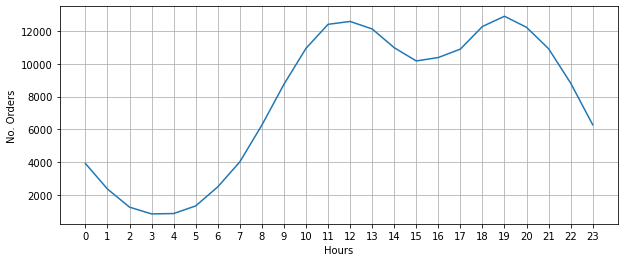

In [23]:
plt.figure(figsize=(10,4))
hours = [hour for hour,df in sales_df.groupby("Hour")]
hourly_sales=sales_df.groupby(["Hour"]).count()["Order ID"]
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("No. Orders")
plt.grid()
plt.ticklabel_format(axis="y",style='plain') 
plt.plot(hours,hourly_sales);



##### What products are mostly sold together?

In [24]:
df = sales_df[sales_df["Order ID"].duplicated(keep= False) ] #filter through the data the duplicated rows with the same IDs

In [27]:
df["Grouped products"] = df.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
df.head()

C:\Users\lenovo laptop\AppData\Local\Temp\ipykernel_1292\3123673014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped products"] = df.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped products
3,176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.000,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.990,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.000,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.950,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.950,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.990,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.990,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [29]:
df = df[["Order ID", "Grouped products"]].drop_duplicates()

,Order ID,Grouped products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [36]:
from itertools import combinations
from collections import Counter

count = Counter()

for x in df["Grouped products"]:
    arr = x.split(",")
    count.update(Counter(combinations(arr,3)))
for k,v in count.most_common(10):
    print(k,v)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


#### What product sold the most and Why?

In [37]:
products_group = sales_df.groupby("Product")
quantity_ordered = products_group.sum()["Quantity Ordered"]

In [38]:
x = [product for product,df in products_group]
y = quantity_ordered

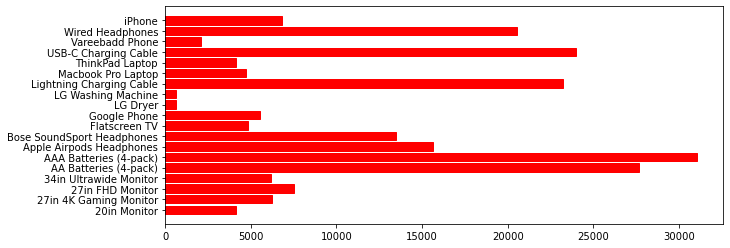

In [41]:

bars = plt.barh(x,y)
for bar in bars:
    bar.set_color("red")

C:\Users\lenovo laptop\AppData\Local\Temp\ipykernel_1292\3246077707.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation="vertical",size=8)


Text(0, 0.5, 'Prices')

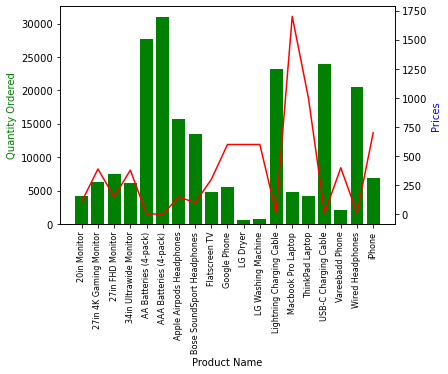

In [53]:
prices = sales_df.groupby("Product").mean()["Price Each"]
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x,y,color='g')
ax2.plot(x,prices,"r-")
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered" , color="g")
ax1.set_xticklabels(x,rotation="vertical",size=8)
ax2.set_ylabel("Prices", color ="b")